In [1]:
#load and visualize the digits data
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

'''
1797 samples, each consisting of an 8*8 grid of pixels
'''

(1797, 8, 8)

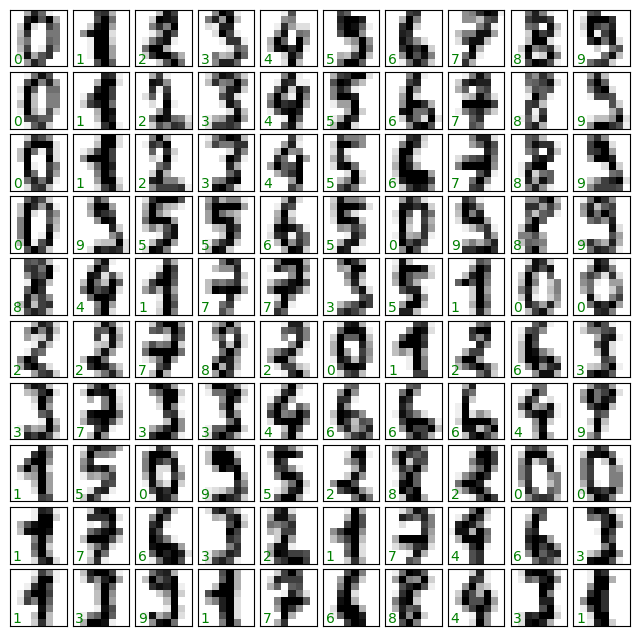

In [4]:
# visualize first 100 digits
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=.1, wspace=.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(.05, .05, str(digits.target[i]), transform=ax.transAxes, color='green')


In [5]:
# each digit has 64 features. 1 pixel = 1 feature. 8 x 8 pixels = 64
X = digits.data
X.shape

(1797, 64)

In [6]:
# target array - pre existing : gives label for each digit
y = digits.target
y.shape

(1797,)

In [7]:
#unsupervised learning : dimensionality reduction
#Reduce data to 2 dims from 64 dimensions using manifold learning algo - Isomap

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


<ipython-input-18-6efe911ba275>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


"\no's and 1's have little overlap\ncontinuous spectrum between 1 and 4\n\n"

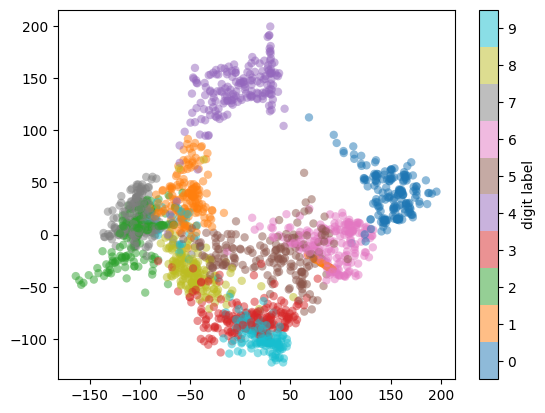

In [18]:
# plot data
plt.scatter(data_projected[:, 0],
            data_projected[:, 1],
            c=digits.target,
            edgecolor='none', alpha=.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-.5, 9.5);


'''
o's and 1's have little overlap
continuous spectrum between 1 and 4
2 and 7 overlap
Despite some mixing, different groups appear to be localized in the space

'''

In [19]:
# classification on digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB() # instantiate model
model.fit(Xtrain, ytrain) # fit model to data
y_model = model.predict(Xtest) # predict on new data

# gauge accuracy

accuracy_score(ytest, y_model)

# 83% accuracy for classification of digits/ labels

0.8333333333333334

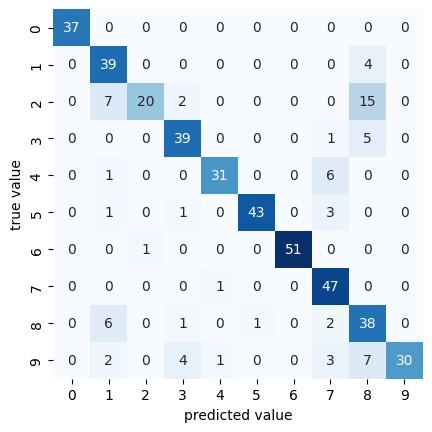

In [20]:
#confusion matrix : tells us where we went wrong
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, y_model) # true and predicted values
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

'''
incorrect predictions :
many 2's are incorrectly predicted as 1(7) or 8 (15)
'''

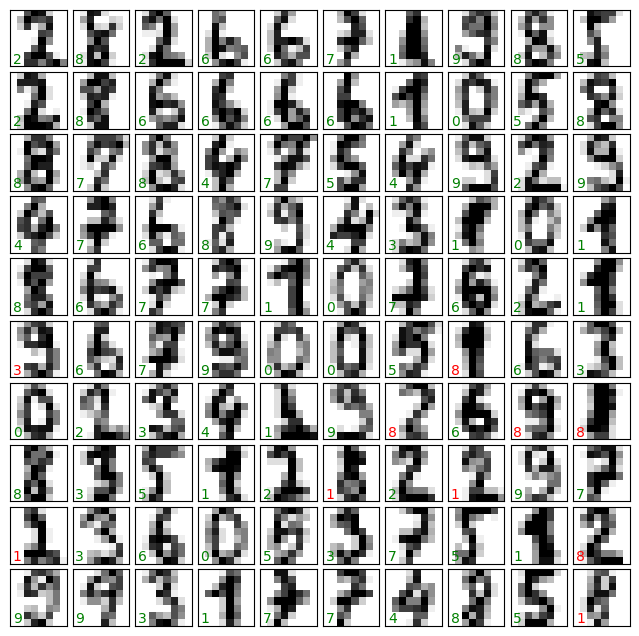

In [21]:
#Another way to gain insight into why wrong prediction is happening : plot inputs with predicted labels
# green for correct labels and red for incorrect

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=.1, wspace=.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
  ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
  ax.text(.05, .05,
          str(y_model[i]),
          transform=ax.transAxes,
          color='green' if (ytest[i] == y_model[i]) else 'red')

  '''
  To go beyond 83% accuracy, use more sophisticated algorithms such as support vector machines, random forests, or others

  '''
